In [1]:
import numpy as np
from random import uniform
from random import randint
from scipy.linalg import solve
import matplotlib.pyplot as plt
from sympy import *
%matplotlib inline

def cal_22stationary_distribution(a, b):
    x = Symbol('x')
    y = Symbol('y')

    trans_p = np.array(
        [[1-a, a],
         [b, 1-b]])
    left = trans_p - np.eye(2)

    res = solve([left[0][0]*x + left[1][0]*y, x + y - 1], [x, y])
    return res


print("The stationary distributions with a=1/10 and b=1/15", 
      cal_22stationary_distribution(1/10, 1/15))
print("The stationary distributions with a=0.5 and b=0.5", 
      cal_22stationary_distribution(0.5, 0.5))
print("The stationary distributions with a=1.0 and b=1.0", 
      cal_22stationary_distribution(1.0, 1.0))

The stationary distributions with a=1/10 and b=1/15 {x: 0.400000000000000, y: 0.600000000000000}
The stationary distributions with a=0.5 and b=0.5 {x: 0.500000000000000, y: 0.500000000000000}
The stationary distributions with a=1.0 and b=1.0 {x: 0.500000000000000, y: 0.500000000000000}


1. DTFS MC Stationary distributions

A stationary distribution of a Markov chain is a probability distribution $\vec \pi$ such that
\begin{align}
\vec \pi = \vec \pi P
\end{align}
Suppose  $\vec \pi$ = ( $\pi_1$,  $\pi_2$), we just calculate
\begin{align}
\vec \pi = \vec \pi P  \\
 \pi_1 + \pi_2 = 1
\end{align}
Therefore, 
when a=1/10 and b=1/15, the stationary distributions is [0.4.  0.6]<br>
when a=0.5 and b=0.55, the stationary distributions is [0.5.  0.5]<br>
when a=1.0 and b=1.0, the stationary distributions is [0.5 0.5] <br>
but when a=0 and b=0, we cannot get unique the stationary distributions, we just could get $\pi_1 + \pi_2 = 1$. Any ($\pi_1, \pi_2$) satisfy the above equation are the stationary distribution.


In [2]:
def check_answer(res, k=4):
    degree_of_freedom = k - 1
    # The threshold at a 5% significance level of different degree_of_freedom
    chi_squared_dict = {
        1: 3.84,
        2: 5.99,
        3: 7.82,
        4: 9.49,
        5: 11.07,
        6: 12.59,
        7: 14.07,
        8: 15.51,
        9: 16.92,
        10: 18.31,
    }
    if res <= chi_squared_dict[degree_of_freedom]:
        probability_of_truth = 0.95
    else:
        probability_of_truth = 0.05
    return probability_of_truth


trans_matrix1 = np.array(
    [[0, 1],
     [1, 0]]
)

trans_matrix2 = np.array(
    [[0.75, 0.25],
     [0.1, 0.9]]
)

trans_matrix3 = np.array(
    [[0.48, 0.48, 0.04],
     [0.22, 0.7, 0.08],
     [0, 0, 1]]
)


pi1 = np.array([1, 0])
pi2 = np.array([1, 0, 0])

I randomly choose one sample path and do the statistic of the state of last 75 samples to simulate the time average and repeat the experiment 75 times，and in the each experiment I count the state of the last sample，what's more， I think of the result as the long-run result. So that we could get the infinite distribution. If the infinite distribution is similar to the time average. We could conclude that the chain is  ergodic. Also we could calculate the period of each state， if the gcd of period is 1 and all the state could communicate， we could get the same conclusion， that is， the chain is ergodic.

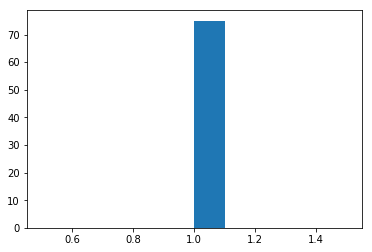

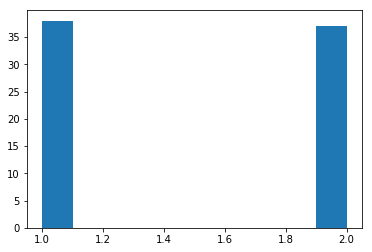

[75  0] [38 37]
the probability that the chains are ergodic is 0.05


In [27]:
last_state = []
time_average = []
rand = randint(0, 75)
for k in range(0, 75):
    tmp = np.dot(pi1, trans_matrix1)
    for i in range(0, 500):
        out = uniform(0, 1)
        if out <= tmp[0]:
            out = 1
        else:
            out = 2
        state = out
        if k == rand and i >= 425:
            time_average.append(state)
        tmp = np.dot(tmp, trans_matrix1)
        if i == 499:
            last_state.append(state)

            
plt.hist(last_state)
plt.show()
plt.hist(time_average)
plt.show()
p, t = np.histogram(time_average, bins=2, range=(1, 2))
p1, t1 = np.histogram(last_state, bins=2, range=(1, 2))
print(p1, p)

res = 0
for i in range(0, 2):
    if p1[i] != 0:
        res += np.power((p[i] - p1[i]), 2)/p1[i]
    else:
        res += np.power((p[i] - p1[i]), 2) / 0.0001

print('the probability that the chains are ergodic is', 
      check_answer(res, 2))

From the transition matrix, we know that it just like flipping cois in specific, the state alternate between 1 and 2. Therefore the periodi of each state is 2. Therefore，the the chains cannot be ergodic.

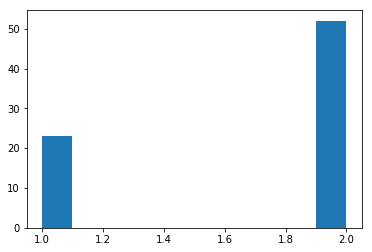

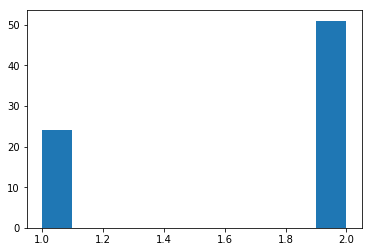

[23 52] [24 51]
the probability that the chains are ergodic is 0.95


In [29]:
last_state = []
time_average = []
rand = randint(0, 75)
for k in range(0, 75):
    tmp = np.dot(pi1, trans_matrix2)
    for i in range(0, 500):
        out = uniform(0, 1)
        if out <= tmp[0]:
            out = 1
        else:
            out = 2
        state = out
        if k == rand and i >= 425:
            time_average.append(state)
        tmp = np.dot(tmp, trans_matrix2)
        if i == 499:
            last_state.append(state)

plt.hist(last_state)
plt.show()
plt.hist(time_average)
plt.show()
p, t = np.histogram(time_average, bins=2, range=(1, 2))
p1, t1 = np.histogram(last_state, bins=2, range=(1, 2))
print(p1, p)
res = 0
for i in range(0, 2):
    if p1[i] != 0:
        res += np.power((p[i] - p1[i]), 2)/p1[i]
    else:
        res += np.power((p[i] - p1[i]), 2) / 0.0001

print('the probability that the chains are ergodic is', 
      check_answer(res, 2))

From the result, we could get the ensemble and time averages are almostly the same，we use chi-squared test to verify that the chains are ergodic.

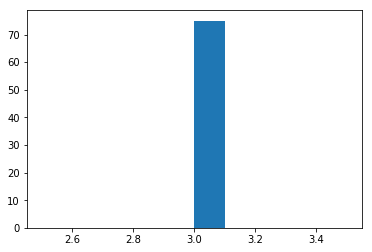

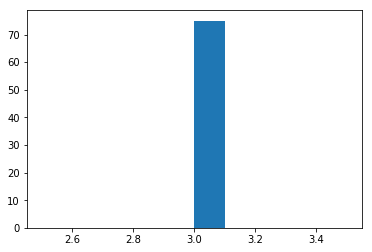

[ 0  0 75] [ 0  0 75]
the probability that the chains are ergodic is 0.95


In [33]:
last_state = []
time_average = []
rand = randint(0, 75)
for k in range(0, 75):
    tmp = np.dot(pi2, trans_matrix3)
    for i in range(0, 500):
        out = uniform(0, 1)
        if out <= tmp[0]:
            out = 1
        elif tmp[0] < out <= tmp[1]:
            out = 2
        else:
            out = 3
        state = out
        if k == rand and i >= 425:
            time_average.append(state)
        tmp = np.dot(tmp, trans_matrix3)  
        if i == 499:
            last_state.append(state)

plt.hist(last_state)
plt.show()
plt.hist(time_average)
plt.show()

p, t = np.histogram(time_average, bins=3, range=(1, 3))
p1, t1 = np.histogram(last_state, bins=3, range=(1, 3))
print(p1, p)
res = 0
for i in range(0, 3):
    if p1[i] != 0:
        res += np.power((p[i] - p1[i]), 2)/p1[i]
    else:
        res += np.power((p[i] - p1[i]), 2) / 0.0001

print('the probability that the chains are ergodic is', 
      check_answer(res, 2))

From the result, we could get the state converge to state 3 and the ensemble and time averages are the same，therefore the chains are ergodic.